In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import seaborn as sns
import mapclassify
df_em = pd.read_csv("../../data/raw/owid_emissions.csv") #Emissions dataframe
df_em

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
#Read in world dataframe which contains geometry of countries to plot with geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).sort_values(by=["name"]).reset_index()
world

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,103,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,82,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...,...,...
172,2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
173,157,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,70,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
175,48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [ ]:
#Drop data before 1960
emissions = df_em.drop(df_em[df_em["year"] < 1960].index)
emissions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
110,Afghanistan,1960,AFG,8622473.0,1.303325e+10,0.018,0.002,0.414,0.029,7.623,...,NaN,0.0,0.0,0.275,0.009,NaN,NaN,NaN,NaN,NaN
111,Afghanistan,1961,AFG,8790140.0,1.314629e+10,0.022,0.002,0.491,0.077,18.583,...,NaN,0.0,0.0,0.261,0.009,NaN,NaN,NaN,NaN,NaN
112,Afghanistan,1962,AFG,8969055.0,1.336763e+10,0.029,0.003,0.689,0.198,40.301,...,NaN,0.0,0.0,0.242,0.010,NaN,NaN,NaN,NaN,NaN
113,Afghanistan,1963,AFG,9157463.0,1.363030e+10,0.051,0.006,0.707,0.018,2.635,...,NaN,0.0,0.0,0.250,0.010,NaN,NaN,NaN,NaN,NaN
114,Afghanistan,1964,AFG,9355510.0,1.387050e+10,0.062,0.007,0.839,0.132,18.651,...,NaN,0.0,0.0,0.205,0.012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
#Replace some country names from emissions dataframe to match ones in world df
emissions.replace({"United States":"United States of America",
                  "Bosnia and Herzegovina": "Bosnia and Herz.",
                  'Democratic Republic of Congo':'Dem. Rep. Congo',
                  "Equatorial Guinea":"Eq. Guinea",
                  'South Sudan':'S. Sudan',
                  'Central African Republic':'Central African Rep.',
                  "Cote d'Ivoire":"Côte d'Ivoire",
                  'Western Sahara':'W. Sahara',
                  'Eswatini':'eSwatini',
                  "Somalia":'Somaliland'}, inplace=True)

In [ ]:
#Pivot so each country is a row and each column is the year
pivot = emissions.pivot(index="country",columns=["year"],values=["co2"])

In [ ]:
pivot = pivot[pivot.index.isin(world["name"].unique().tolist())]
pivot

co2                                                           \
year          1960   1961   1962   1963   1964   1965   1966   1967    1968   
country                                                                       
Afghanistan  0.414  0.491  0.689  0.707  0.839  1.007  1.091  1.282   1.223   
Albania      2.022  2.279  2.462  2.081  2.015  2.172  2.550  2.677   3.069   
Algeria      6.151  6.056  5.661  5.419  5.643  6.589  8.421  8.432   9.050   
Angola       0.549  0.454  1.179  1.150  1.223  1.186  1.552  0.992   1.670   
Antarctica     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
...            ...    ...    ...    ...    ...    ...    ...    ...     ...   
W. Sahara      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
Yemen        3.631  2.664  3.884  2.917  3.631  3.928  3.462  3.052  11.637   
Zambia       4.355  3.709  3.583  3.444  3.275  3.912  3.498  4.788   4.568   
Zimbabwe     5.943  5.061  4.889  4.700  4.469  5.209  6.041  5.294   6.378   
eSwatini     0.033  0.004    NaN    NaN  0.011  0.081  0.202  0.227   0.278   

                     ...                                               \
year           1969  ...     2012     2013     2014     2015     2016   
country              ...                                                
Afghanistan   0.941  ...   10.035    9.251    9.170    9.791    9.068   
Albania       3.241  ...    4.850    5.287    6.000    4.712    4.632   
Algeria      11.263  ...  135.674  140.786  151.283  160.087  158.748   
Angola        2.783  ...   25.540   24.719   25.148   25.531   27.210   
Antarctica      NaN  ...      NaN      NaN      NaN      NaN      NaN   
...             ...  ...      ...      ...      ...      ...      ...   
W. Sahara       NaN  ...      NaN      NaN      NaN      NaN      NaN   
Yemen         4.675  ...   20.356   27.160   26.477   14.084   10.902   
Zambia        4.271  ...    4.166    4.416    4.877    5.065    5.857   
Zimbabwe      6.744  ...   11.254   11.671   11.946   12.255   10.533   
eSwatini      0.304  ...    1.169    1.400    0.769    0.868    1.055   

                                                          
year            2017     2018     2019     2020     2021  
country                                                   
Afghanistan    9.868   10.818   11.082   11.682   11.874  
Albania        5.564    4.984    4.947    4.729    4.619  
Algeria      166.411  173.912  179.505  172.504  176.269  
Angola        24.304   22.779   21.818   20.276   21.363  
Antarctica       NaN      NaN      NaN      NaN      NaN  
...              ...      ...      ...      ...      ...  
W. Sahara        NaN      NaN      NaN      NaN      NaN  
Yemen         10.589   10.474   12.684   12.140   12.477  
Zambia         6.843    7.412    7.747    7.281    7.676  
Zimbabwe       9.596   11.795   11.115   10.608   11.296  
eSwatini       0.986    1.033    1.121    1.060    1.087  

[170 rows x 62 columns]

In [ ]:
world.index = world["name"]
world.drop(["index","iso_a3"],axis=1,inplace=True)
for i in range(1960,2014):
    curr = f"{i}_co2"
    world[curr] = pivot["co2",i]
world

,pop_est,continent,name,gdp_md_est,geometry,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,...,2004_co2,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.414,0.491,0.689,0.707,0.839,...,1.237,1.890,2.159,2.800,4.254,6.392,8.365,11.838,10.035,9.251
Albania,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2.022,2.279,2.462,2.081,2.015,...,4.177,4.261,3.911,3.949,4.397,4.407,4.784,5.315,4.850,5.287
Algeria,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",6.151,6.056,5.661,5.419,5.643,...,87.853,106.473,100.203,108.402,109.032,120.185,117.813,119.808,135.674,140.786
Angola,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.549,0.454,1.179,1.150,1.223,...,18.701,19.006,22.102,24.977,25.486,27.565,28.865,30.330,25.540,24.719
Antarctica,4490.0,Antarctica,Antarctica,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,NaN,NaN,NaN,...,0.007,0.007,0.007,0.011,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W. Sahara,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",3.631,2.664,3.884,2.917,3.631,...,18.647,19.794,21.085,20.719,22.025,24.251,23.151,20.190,20.356,27.160
Zambia,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",4.355,3.709,3.583,3.444,3.275,...,2.104,2.243,2.231,2.294,2.553,2.940,3.120,3.372,4.166,4.416


In [ ]:
temp_df = pd.read_csv("../../data/raw/GlobalLandTemperaturesByCountry.csv")
temp_df["dt"] = (temp_df["dt"].apply(pd.to_datetime)).dt.date #Converts to datetime (Takes a while)
temp_df["year"] = [x.year for x in temp_df["dt"]] #Just shows the year
temp_df = temp_df.groupby([temp_df["year"],temp_df["Country"]])["AverageTemperature"].mean(numeric_only=True).reset_index()#Convertes monthly average temp into annaully
               
pivoted_df = (temp_df.sort_values(by=["Country","year"])
        .loc[lambda x: x.year > 1959] #Drops rows from before 1960
        .replace({"United States":"United States of America", #Changes a few country names for plotting with geopandas
                     "Congo (Democratic Republic Of The)" : "Dem. Rep. Congo",
                     "Central African Republic":"Central African Rep.",
                     "Côte D'Ivoire":"Côte d'Ivoire",
                     "Czech Republic":"Czechia"}))


In [ ]:
list2 = pivoted_df["Country"].tolist()
pivoted_df = pivoted_df[pivoted_df["Country"].isin(world["name"].unique().tolist())] #Gets rid of any country which is not in world data (basically small island nations)
pivoted_df = pd.pivot_table(pivoted_df,index="Country",columns="year",values="AverageTemperature").reset_index()
pivoted_df.index = pivoted_df["Country"]

In [ ]:
pivoted_df

year,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,13.985417,14.064917,13.768667,15.033417,13.084917,14.101833,14.343000,13.663250,13.762333,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Albania,Albania,13.335083,13.316750,13.068750,13.085833,12.515333,12.378417,13.204583,12.621750,12.869583,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria,Algeria,23.504083,23.390333,23.182417,23.317833,23.147500,22.973750,23.301333,22.861667,23.185917,...,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500
Angola,Angola,21.927083,21.938750,21.848667,21.837750,21.686417,21.819917,22.103250,21.776417,21.748167,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.316500,22.681500,22.029667,22.123333,22.507875
Argentina,Argentina,14.993667,14.972917,14.852417,14.847167,14.431250,14.909583,14.678000,15.049750,15.196917,...,15.442167,15.112833,15.561083,14.628083,15.476000,15.534417,15.078833,15.339667,15.689000,14.457125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Venezuela,25.401167,25.387250,25.425333,25.417083,25.364417,25.291083,25.542000,25.058917,25.084417,...,25.817833,26.019417,25.849917,25.854083,25.648250,26.084917,26.150250,25.677333,25.688583,25.912875
Vietnam,Vietnam,24.144083,24.092667,23.702333,23.757583,23.953667,24.099167,24.521333,23.638833,23.903417,...,24.056917,24.298000,24.523083,24.302167,23.784000,24.465583,24.833333,23.692583,24.704333,25.232125
Yemen,Yemen,26.319083,26.331167,26.197333,26.268667,26.099083,25.967667,26.483833,26.268250,26.104833,...,27.334083,27.294667,27.175000,27.310750,26.807500,27.342417,27.302750,27.288250,27.445000,28.129750


In [ ]:
world = pd.concat((world,pivoted_df),axis=1)

In [ ]:
tempColumnNames = {}
for i in range(1960,2014):
   tempColumnNames[i] = f"{i}_temp"
world = world.rename(columns=tempColumnNames).drop(["Fr. S. Antarctic Lands","Antarctica"])
world

,pop_est,continent,name,gdp_md_est,geometry,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,...,2004_temp,2005_temp,2006_temp,2007_temp,2008_temp,2009_temp,2010_temp,2011_temp,2012_temp,2013_temp
Afghanistan,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.414,0.491,0.689,0.707,0.839,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Albania,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2.022,2.279,2.462,2.081,2.015,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",6.151,6.056,5.661,5.419,5.643,...,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500
Angola,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.549,0.454,1.179,1.150,1.223,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.316500,22.681500,22.029667,22.123333,22.507875
Argentina,44938712.0,South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",48.764,51.127,53.640,50.033,55.670,...,15.442167,15.112833,15.561083,14.628083,15.476000,15.534417,15.078833,15.339667,15.689000,14.457125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W. Sahara,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",3.631,2.664,3.884,2.917,3.631,...,27.334083,27.294667,27.175000,27.310750,26.807500,27.342417,27.302750,27.288250,27.445000,28.129750
Zambia,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",4.355,3.709,3.583,3.444,3.275,...,21.768083,22.813500,21.784250,21.838500,21.535833,21.670250,22.267500,21.771583,21.697750,21.196000
Zimbabwe,14645468.0,Africa,Zimbabwe,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5.943,5.061,4.889,4.700,4.469,...,21.330917,22.509917,21.618750,21.604250,21.545583,21.377250,21.986250,21.602417,21.521333,20.710750


In [ ]:
#Delta Temp is the average temp from 1960-1964 subtracted from the average temp of 2009-2013
world["delta_temp"] = world.iloc[:,109:114].mean(axis=1) - world.iloc[:,60:65].mean(axis=1)
#TotalCo2 is the amount of co2 emitted from 1960-2013
world['totalCo2'] = world.iloc[:,5:59].sum(axis=1)
world["Co2PerPerson(Tonnes)"] = (world.iloc[:,115] / world.iloc[:,0]) * 1000000
world.iloc[:,113:]

,2013_temp,delta_temp,totalCo2,Co2PerPerson(Tonnes)
Afghanistan,16.533625,1.536458,132.801,3.490927
Albania,14.993875,0.900658,238.845,83.682206
Algeria,25.121500,1.209667,3470.584,80.611796
Angola,22.507875,0.484042,464.574,14.597634
Argentina,14.457125,0.400325,6241.188,138.882218
...,...,...,...,...
W. Sahara,NaN,NaN,0.000,0.000000
Yemen,28.129750,1.258567,524.832,17.997168
Zambia,21.196000,0.450217,168.713,9.445872
Zimbabwe,20.710750,0.268250,566.098,38.653459


In [ ]:
world.to_csv("../../data/processed/processedWorldData.csv")

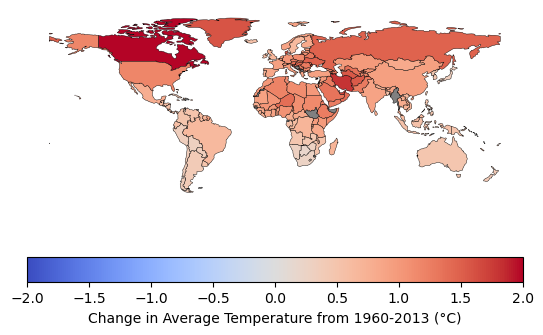

In [ ]:
missing_kwds = dict(color='grey', label='No Data')
fig, ax= plt.subplots(1,1)
deltaTempPlot = world.plot(column="delta_temp",
           ax=ax,
           legend=True,
            edgecolor='k',
            linewidth=0.3,
           cmap="coolwarm",
           legend_kwds={"label":"Change in Average Temperature from 1960-2013 (°C)",
                        "orientation":"horizontal"},
            vmin=-2,
            vmax=2,
            missing_kwds=missing_kwds)
deltaTempPlot.set_axis_off()

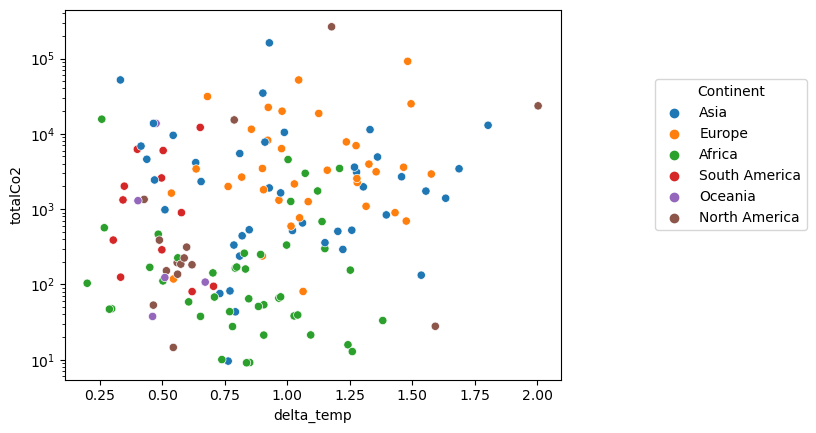

In [ ]:
scatter = sns.scatterplot(data=world,x="delta_temp",y="totalCo2",hue="continent")
scatter.legend(bbox_to_anchor=(1.05,1),loc="upper left", borderaxespad=5,title="Continent")
plt.yscale('log')

In [ ]:
world["delta_temp"].corr(world["totalCo2"])

0.10635739706826056

In [ ]:
world["totalCo2"].describe()

count       175.000000
mean       6356.421949
std       25085.006720
min           0.000000
25%          78.028500
50%         519.961000
75%        3118.199000
max      263916.360000
Name: totalCo2, dtype: float64

Text(0.5, 29.1406250000001, 'Change in Average Temperature from 1960-2013 (°C)')

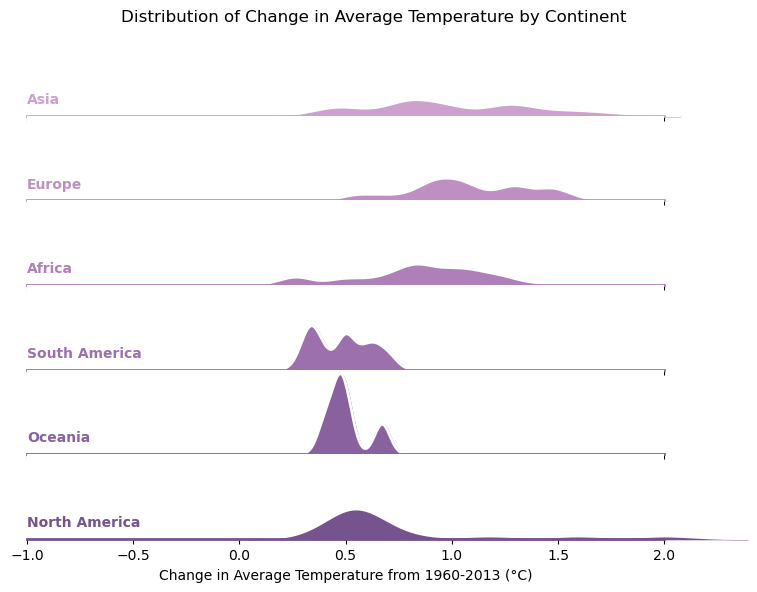

In [ ]:
#Parts of code used to tune this plot copied from this website: https://seaborn.pydata.org/examples/kde_ridgeplot
palette = sns.cubehelix_palette(10, rot=0.2, light=.7)
test = sns.FacetGrid(world,row="continent",hue="continent",aspect=8,height=1,palette=palette)
test.map(sns.kdeplot, "delta_temp", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
test.map(sns.kdeplot, "delta_temp", clip_on=False, color="w", lw=2, bw_adjust=.5)
test.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.xlim(-1,2)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


test.map(label, "continent")




test.figure.subplots_adjust(hspace=0)
# Remove axes details that don't play well with overlap
test.set_titles("")
test.set(yticks=[], ylabel="")
test.despine(bottom=True, left=True)
#test.fig.subplots_adjust(top=1.25)
test.fig.suptitle("Distribution of Change in Average Temperature by Continent")
plt.xlabel("Change in Average Temperature from 1960-2013 (°C)")

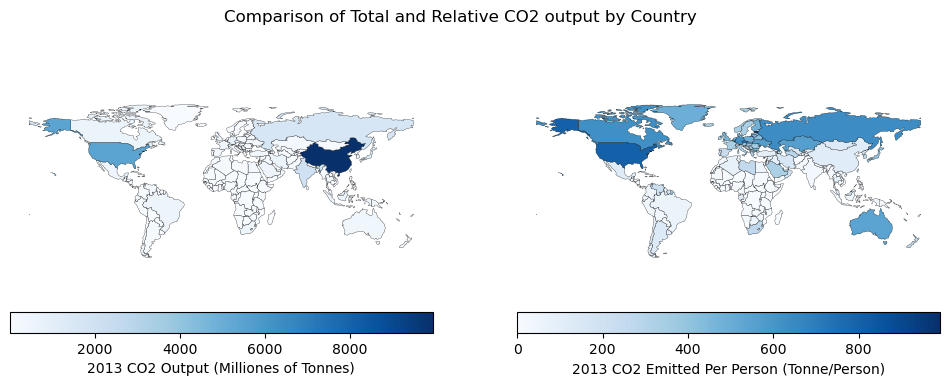

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 4))
totalco2 =world.plot(ax=ax1,column="2013_co2",cmap="Blues",legend=True,edgecolor='k',linewidth=0.2,  legend_kwds={"label":"2013 CO2 Output (Milliones of Tonnes)",
                        "orientation":"horizontal"},)
relativeco2 = world.plot(ax=ax2,column="Co2PerPerson(Tonnes)",cmap="Blues",legend=True,edgecolor='k',linewidth=0.2,  legend_kwds={"label":"2013 CO2 Emitted Per Person (Tonne/Person)",
                        "orientation":"horizontal"})
fig.suptitle("Comparison of Total and Relative CO2 output by Country")
totalco2.set_axis_off()
relativeco2.set_axis_off()

<AxesSubplot:>

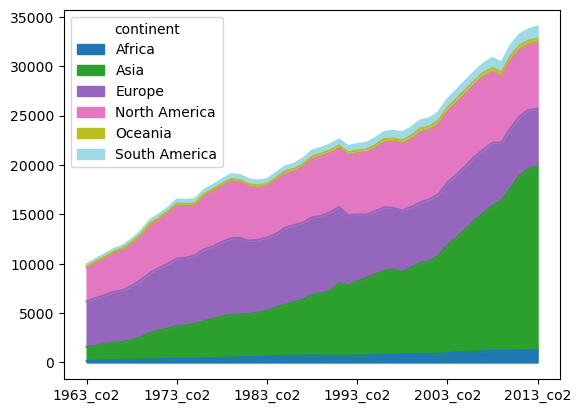

In [ ]:
world.groupby(by='continent').sum(numeric_only=True).iloc[:,5:56].transpose().plot.area(stacked=True,cmap="tab20")